# <center>  Predict Severity of Car Accident </center>

## Introduction
This notebook will be mainly used for the capstone project.  
In this project we will try to predict the severity of car collisions from the data.  
Let's start playing with the data. We will be working according to the following workflow: 
1.  Download data

-   Data Overview
-   Data cleaning
-   Feature selection
-   Exploratory data analysis
-   Regressiong Model
-   Clasification Model
-   Model Evaluation

# 1. Download data
We download the the dataset [National Collision Database](https://open.canada.ca/data/en/dataset/1eb9eba7-71d1-4b30-9fb1-30cbdab7e63a) and save it as __"NCDB.csv"__

# 2. Data Overview

We have found a more complete dataset of the sample dataset from [this page](https://data-seattlecitygis.opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0)
The matadata of this dataset can be found [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)

We will use the following variables from the dataset:   
- ADDRTYPE 
- COLLISIONTYPE
- PERSONCOUNT
- PEDCOUNT
- PEDCYLCOUNT
- VEHCOUNT
- JUNCTIONTYPE
- WEATHER
- ROADCOND
- LIGHTCOND

The dependent viable is 
- SEVERITYCODE

## 2.1 Load the dataset

We will import the .csv 
then we creates the columns for year, month and day.

In [4]:
import csv
import pandas as pd
import numpy as np

filename='NCDB_2014.csv'

#Read csv
pdf = pd.read_csv(filename)
pdf.head()

,C_YEAR,C_MNTH,C_WDAY,C_HOUR,C_SEV,C_VEHS,C_CONF,C_RCFG,C_WTHR,C_RSUR,...,V_ID,V_TYPE,V_YEAR,P_ID,P_SEX,P_AGE,P_PSN,P_ISEV,P_SAFE,P_USER
0,2014,1,1,10,2,1,02,03,1,3,...,1,01,UUUU,01,M,75,11,2,NN,1
1,2014,1,1,12,2,1,04,UU,1,5,...,1,01,UUUU,01,F,21,11,2,02,1
2,2014,1,1,00,2,1,03,UU,7,3,...,1,01,UUUU,01,F,34,11,2,02,1
3,2014,1,1,17,2,2,21,UU,1,1,...,1,01,UUUU,01,F,50,11,2,02,1
4,2014,1,1,17,2,2,21,UU,1,1,...,2,01,UUUU,01,M,63,11,1,NN,1


In [3]:
pdf.dtypes

C_YEAR     int64
C_MNTH    object
C_WDAY    object
C_HOUR    object
C_SEV      int64
C_VEHS    object
C_CONF    object
C_RCFG    object
C_WTHR    object
C_RSUR    object
C_RALN    object
C_TRAF    object
V_ID      object
V_TYPE    object
V_YEAR    object
P_ID      object
P_SEX     object
P_AGE     object
P_PSN     object
P_ISEV    object
P_SAFE    object
P_USER    object
dtype: object

# 3. Data Cleaning

## 3.1 Identify and handle missing values

In [28]:
columns = ['ADDRTYPE','SEVERITYCODE','PERSONCOUNT','PEDCOUNT',
           'PEDCYLCOUNT','VEHCOUNT','JUNCTIONTYPE',
          'WEATHER','ROADCOND','LIGHTCOND']
df = pdf[columns]

for column in df.columns:
    print(df[column].value_counts())
# Convert "?" to NaN
df.replace("?", np.nan, inplace=True)

# simply drop All Rows with any Null/NaN/NaT Values
# df.dropna(subset=["SEVERITYCODE"], axis=0, inplace=True)
df.dropna(axis=0, inplace=True)

# Drop the rows with SEVERITYCODE values 0 (unknown)
df.drop(df[df['SEVERITYCODE'] == '0'].index,inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)

df.shape

/Users/hanrong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(188220, 10)

## 4. Feature selection

## 5. Exploratory data analysis

## 6. Regressiong Model

## 7. Clasification Model

## 8. Model Evaluation

## Data visualization and pre-processing


In [30]:
# Let’s see how many of each class is in our data set 
df['SEVERITYCODE'].value_counts()

1     127538
2      57316
2b      3028
3        338
Name: SEVERITYCODE, dtype: int64

### Undersampling the data
Undersampling is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

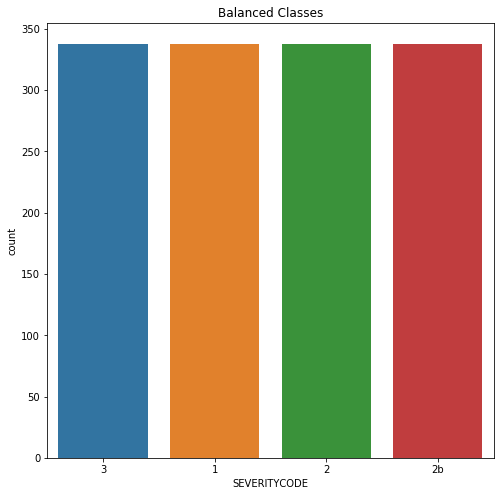

In [32]:
# Shuffle the Dataset.
shuffled_df = df.sample(frac=1,random_state=4)

# Put all SEVERITYCODE=3 class in a separate dataset.
df_3 = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == '3']

#Randomly select 338 observations from the 3 majority class
rdm_df1 = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == '1'].sample(n=338,random_state=35)
rdm_df2 = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == '2'].sample(n=338,random_state=35)
rdm_df2b = shuffled_df.loc[shuffled_df['SEVERITYCODE'] == '2b'].sample(n=338,random_state=35)

# Concatenate both dataframes again
normalized_df = pd.concat([df_3, rdm_df1,rdm_df2,rdm_df2b])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('SEVERITYCODE', data=normalized_df)
plt.title('Balanced Classes')
plt.show()